In [22]:
!pip install keras

In [23]:
!pip install tensorflow

  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


# 기본 (shuffle, rmsprop)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_47 (LSTM)              (None, 64)                29440     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 9s 57ms/step - loss: 0.0024 - val_loss: 6.5466e-04
Epoch 2/20
95/95 [==============================] - 4s 37ms/step - loss: 0.0013 - val_loss: 5.4848e-04
Epoch 3/20
95/95 [==============================] - 2s 19ms/step - loss: 

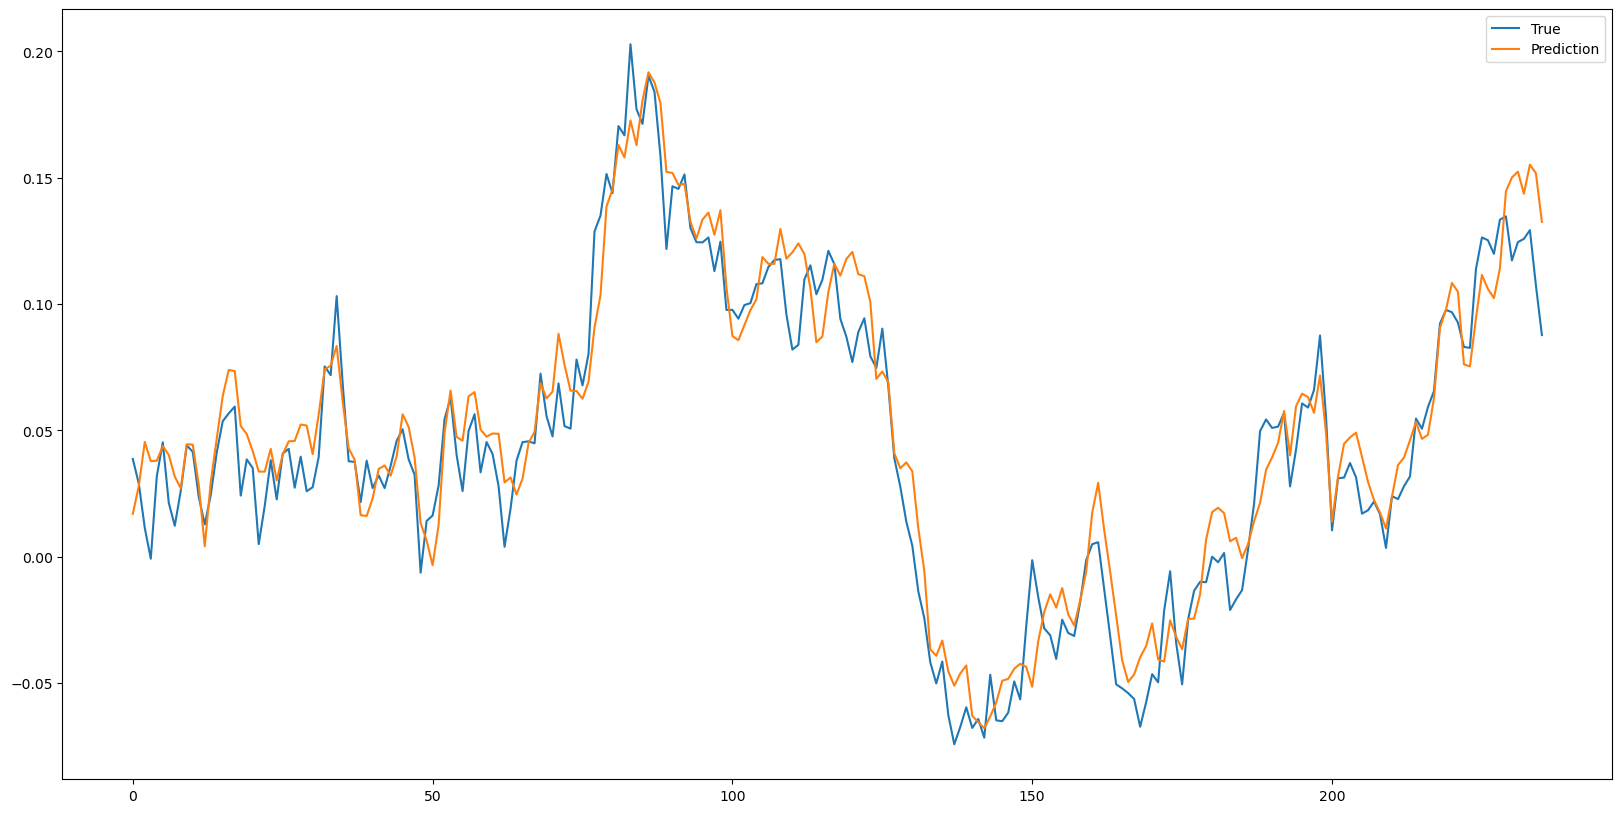

In [49]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드


## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])




# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함
np.random.shuffle(train) # training set은 랜덤으로 섞어주는게 좋음.

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='rmsprop') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) # 그래프를 생성 facecolor='white' 배경색을 흰색, figsize=(20, 10) 그래프의 크기를 설정
ax = fig.add_subplot(111) # 111은 그리드 파라미터로, 1x1 그리드의 첫 번째 서브플롯
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend() # 범례 추가
plt.show()

# adam optimizer사용

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_19 (LSTM)              (None, 64)                29440     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 11s 63ms/step - loss: 0.0027 - val_loss: 5.2489e-04
Epoch 2/20
95/95 [==============================] - 4s 44ms/step - loss: 0.0010 - val_loss: 4.4503e-04
Epoch 3/20
95/95 [==============================] - 4s 37ms/step - loss: 

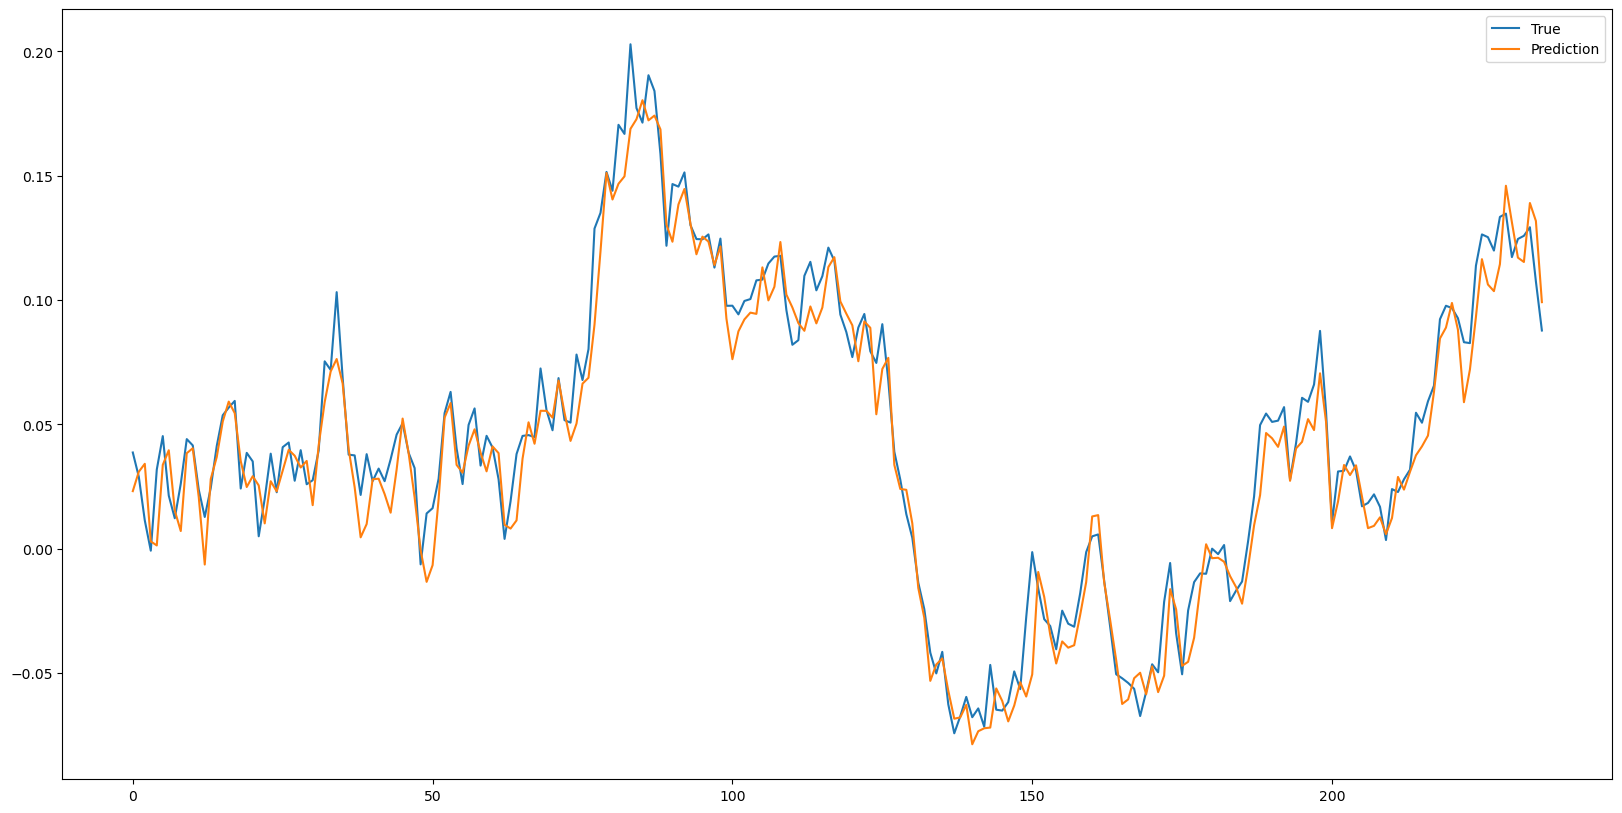

In [33]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드


## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함
np.random.shuffle(train) # training set은 랜덤으로 섞어주는게 좋음.

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) # 그래프를 생성 facecolor='white' 배경색을 흰색, figsize=(20, 10) 그래프의 크기를 설정
ax = fig.add_subplot(111) # 111은 그리드 파라미터로, 1x1 그리드의 첫 번째 서브플롯
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend() # 범례 추가
plt.show()

# 데이터 셔플 안함

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_15 (LSTM)              (None, 64)                29440     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 7s 30ms/step - loss: 0.0022 - val_loss: 5.9015e-04
Epoch 2/20
95/95 [==============================] - 2s 20ms/step - loss: 9.7201e-04 - val_loss: 4.8332e-04
Epoch 3/20
95/95 [==============================] - 2s 23ms/step - los

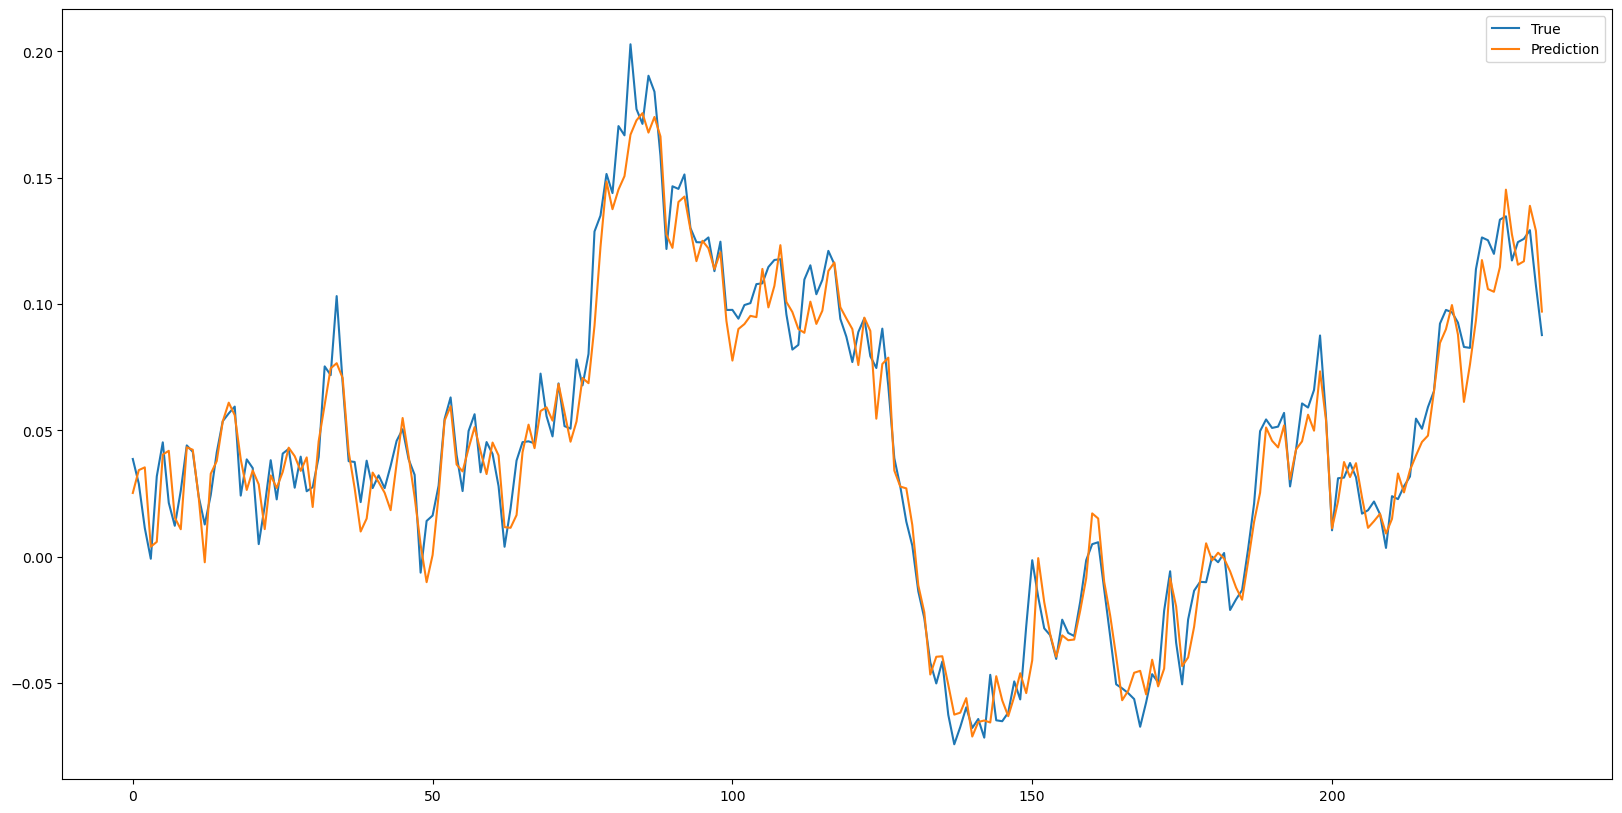

In [30]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드


## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) # 그래프를 생성 facecolor='white' 배경색을 흰색, figsize=(20, 10) 그래프의 크기를 설정
ax = fig.add_subplot(111) # 111은 그리드 파라미터로, 1x1 그리드의 첫 번째 서브플롯
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend() # 범례 추가
plt.show()

In [26]:
# 미래 시각화




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20

95/95 [==============================] - 15s 80ms/step - loss: 0.0024 - val_loss: 4.9756e-04
Epoch 2/20
95/95 [==============================] - 4s 44ms/step - loss: 0.0011 - val_loss: 4.6639e-04
Epoch 3/20
95/95 [==============================] - 5s 53ms/step - loss

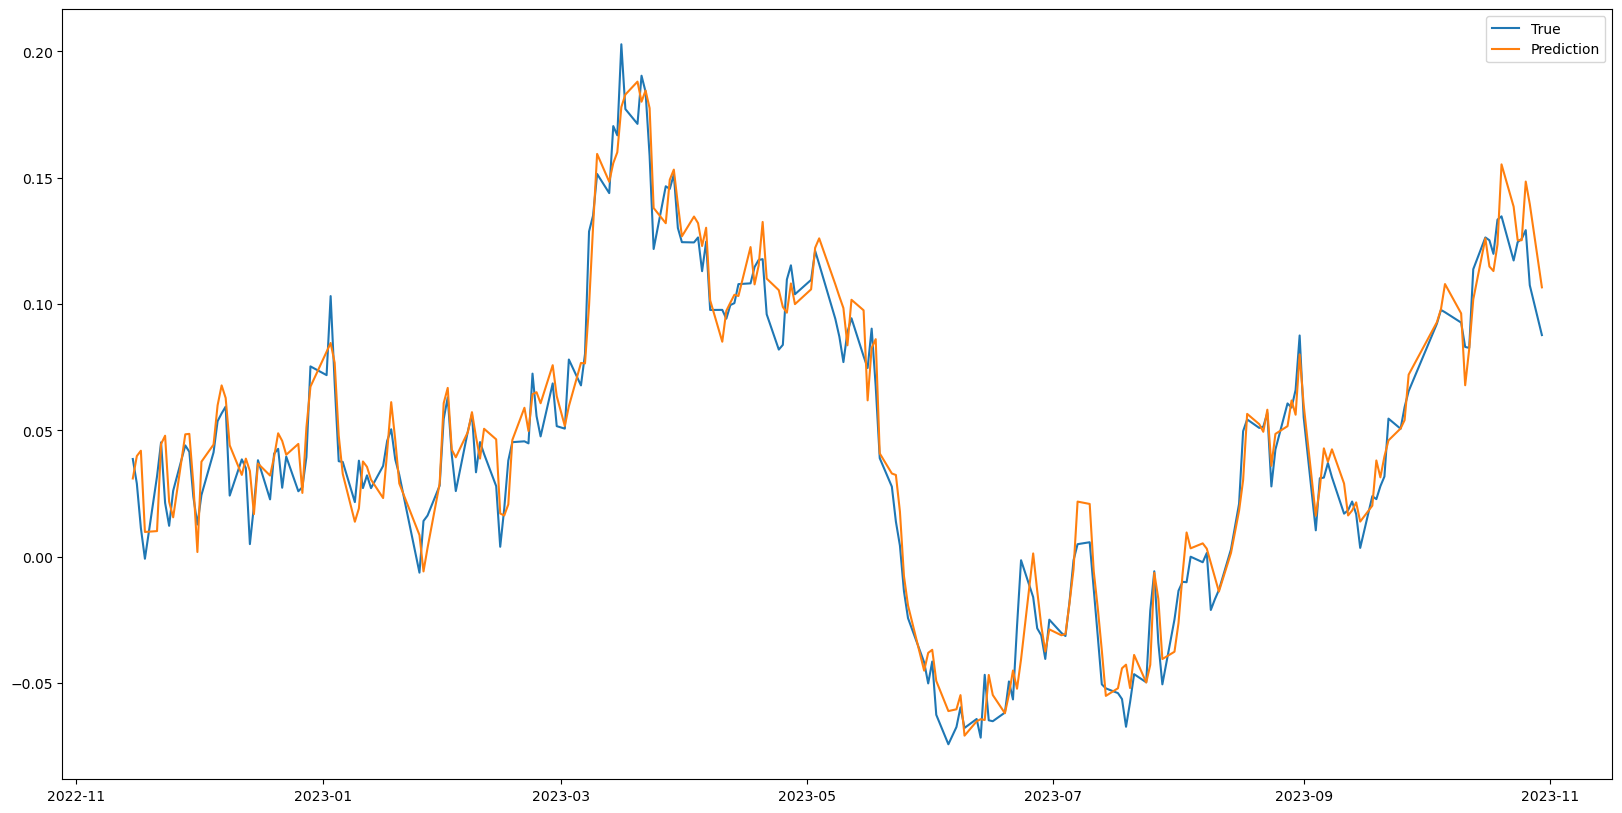

In [1]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range = data.index[row: row + len(y_test)]

ax.plot(x_range, y_test, label='True')
ax.plot(x_range, pred, label='Prediction')
ax.legend()
plt.show()



Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_87 (LSTM)              (None, 64)                29440     
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 8s 49ms/step - loss: 0.0020 - val_loss: 7.1512e-04
Epoch 2/20
95/95 [==============================] - 3s 26ms/step - loss: 0.0011 - val_loss: 5.5079e-04
Epoch 3/20
95/95 [==============================] - 2s 21ms/step - loss: 

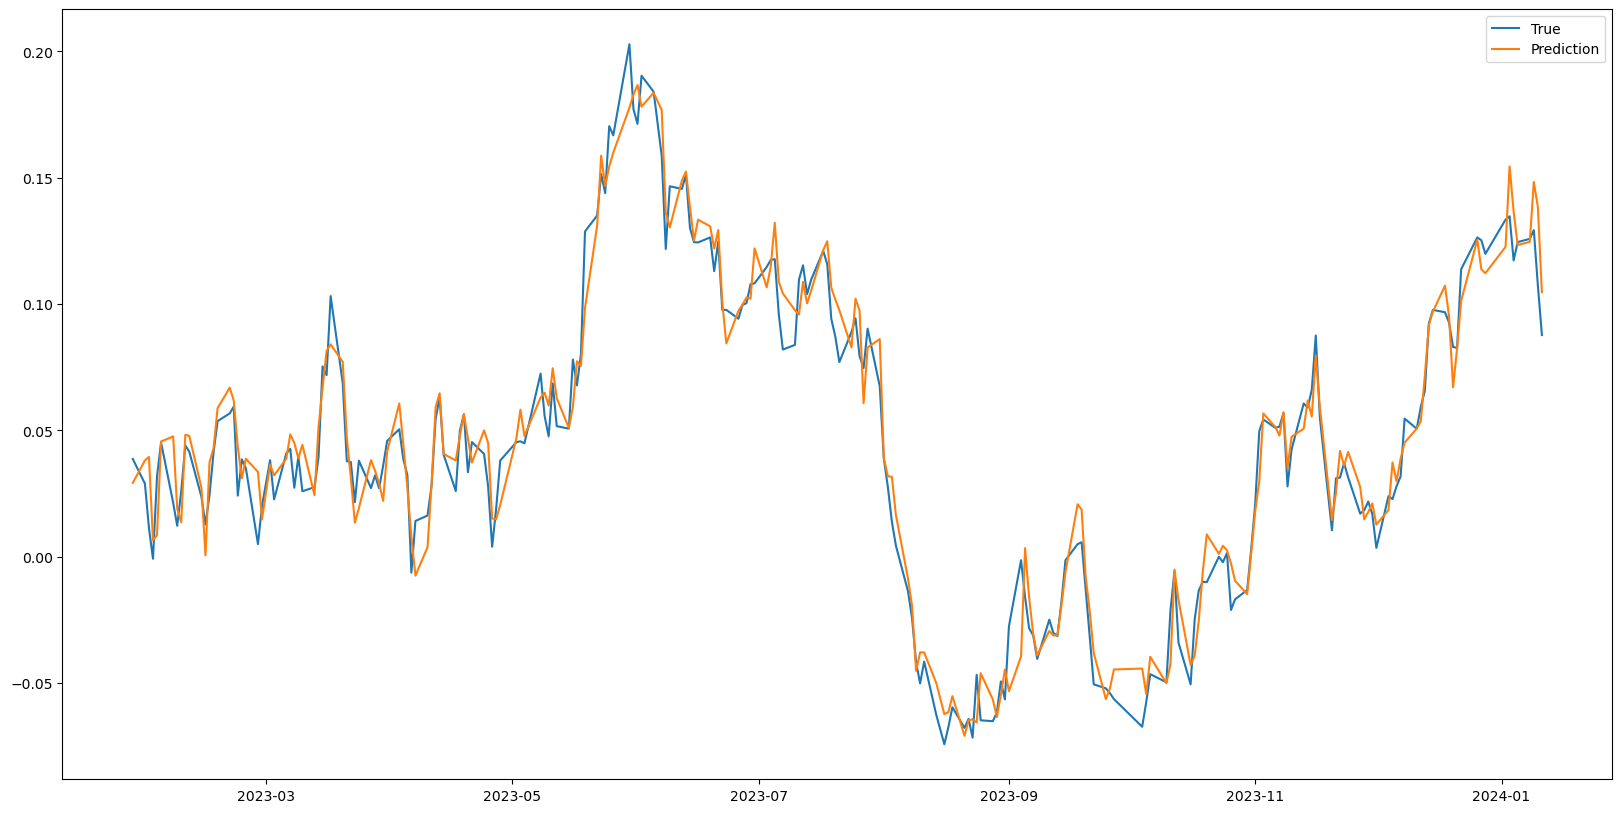

In [72]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range = data.index[row+seq_len : row + len(y_test)+seq_len]

ax.plot(x_range, y_test, label='True')
ax.plot(x_range, pred, label='Prediction')
ax.legend()
plt.show()


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_91 (LSTM)              (None, 64)                29440     
                                                                 
 dense_45 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 8s 54ms/step - loss: 0.0021 - val_loss: 4.5223e-04
Epoch 2/20
95/95 [==============================] - 4s 41ms/step - loss: 9.2220e-04 - val_loss: 4.4736e-04
Epoch 3/20
95/95 [==============================] - 4s 43ms/step - lo

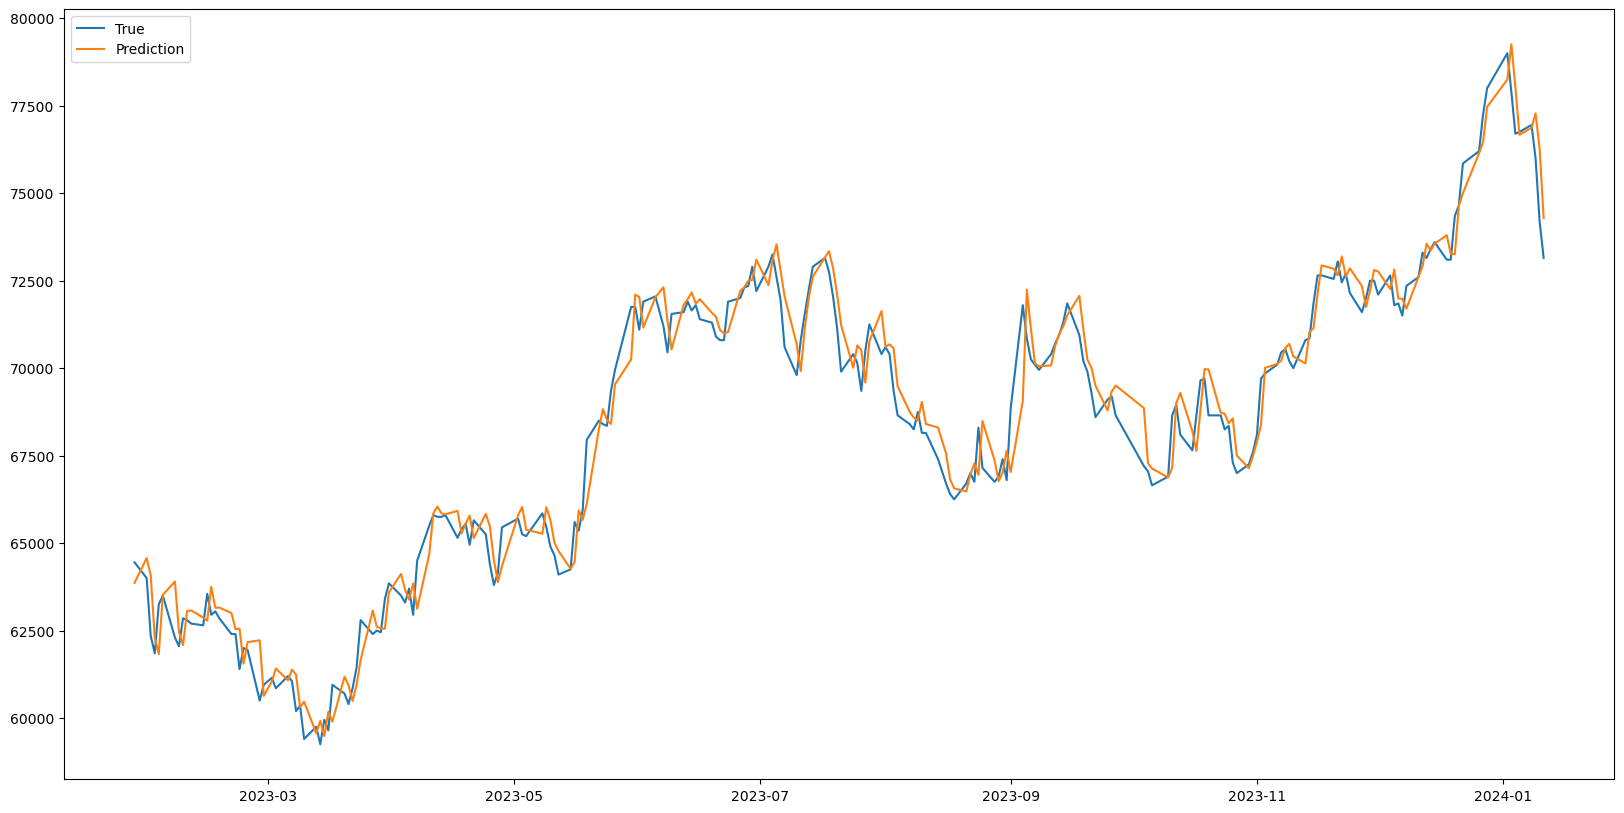

In [74]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# Recover the original prices instead of the scaled version
pred_result = []
y_test_result = []
for i in range(len(y_test)):
    pred_result.append((pred[i] + 1) * mid_prices[row + i])
    y_test_result.append((y_test[i] + 1) * mid_prices[row + i])


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range = data.index[row+seq_len : row + len(y_test_result)+seq_len]

ax.plot(x_range, y_test_result, label='True')
ax.plot(x_range, pred_result, label='Prediction')
ax.legend()
plt.show()



Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_94 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_95 (LSTM)              (None, 64)                29440     
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 8s 55ms/step - loss: 0.0020 - val_loss: 5.0906e-04
Epoch 2/20
95/95 [==============================] - 4s 43ms/step - loss: 9.8263e-04 - val_loss: 3.9937e-04
Epoch 3/20
95/95 [==============================] - 4s 44ms/step - lo

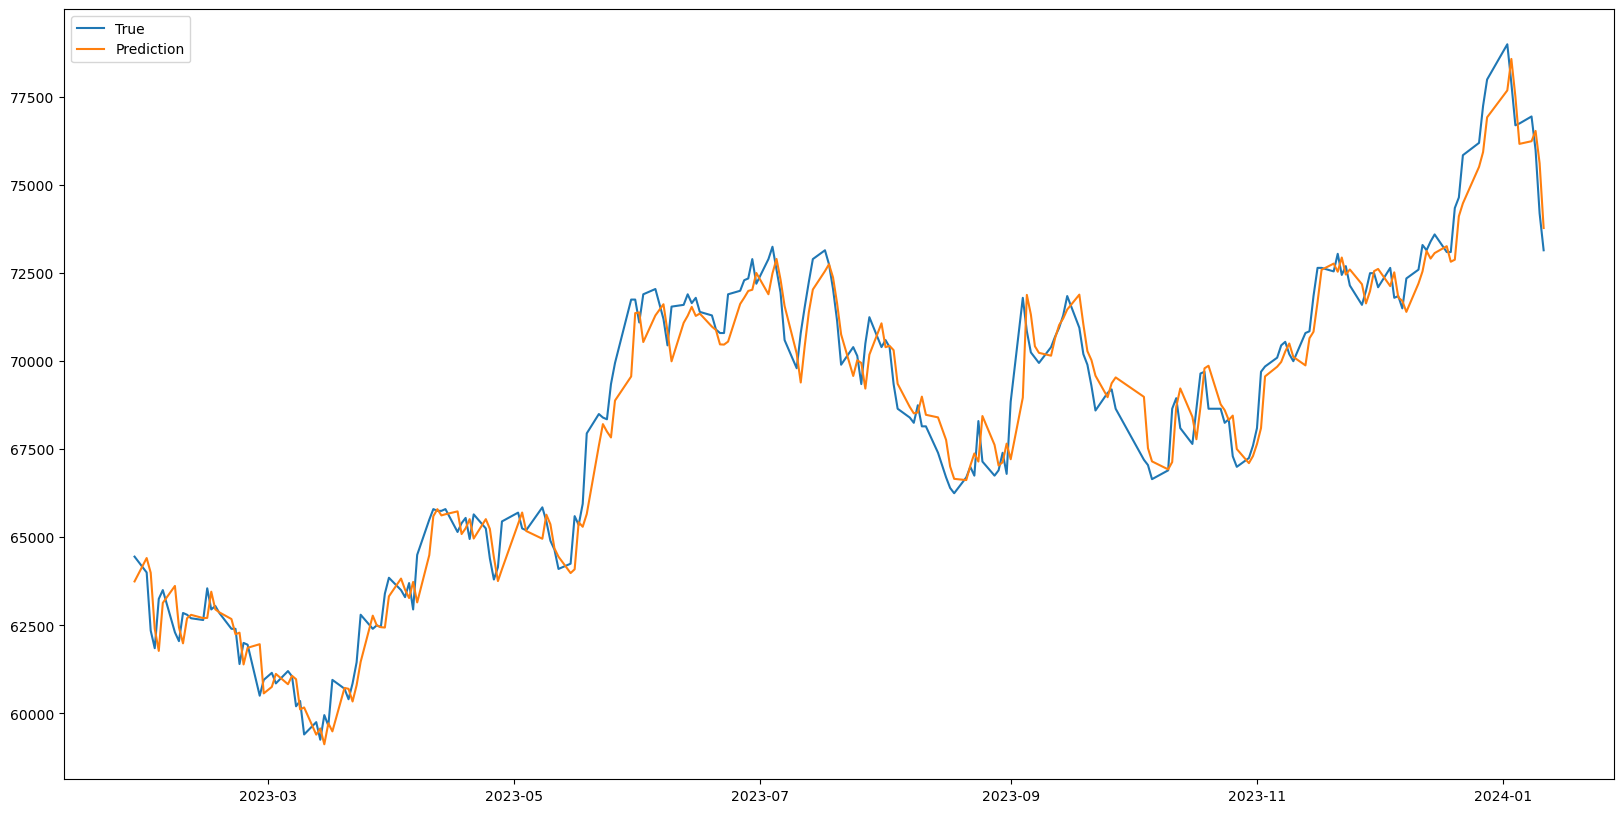

In [76]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# Recover the original prices instead of the scaled version
pred_result = []
y_test_result = []
for i in range(len(y_test)):
    pred_result.append((pred[i] + 1) * mid_prices[row + i])
    y_test_result.append((y_test[i] + 1) * mid_prices[row + i])

# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range = data.index[row+seq_len : row + len(y_test_result)+seq_len]

ax.plot(x_range, y_test_result, label='True')
ax.plot(x_range, pred_result, label='Prediction')
ax.legend()
plt.show()




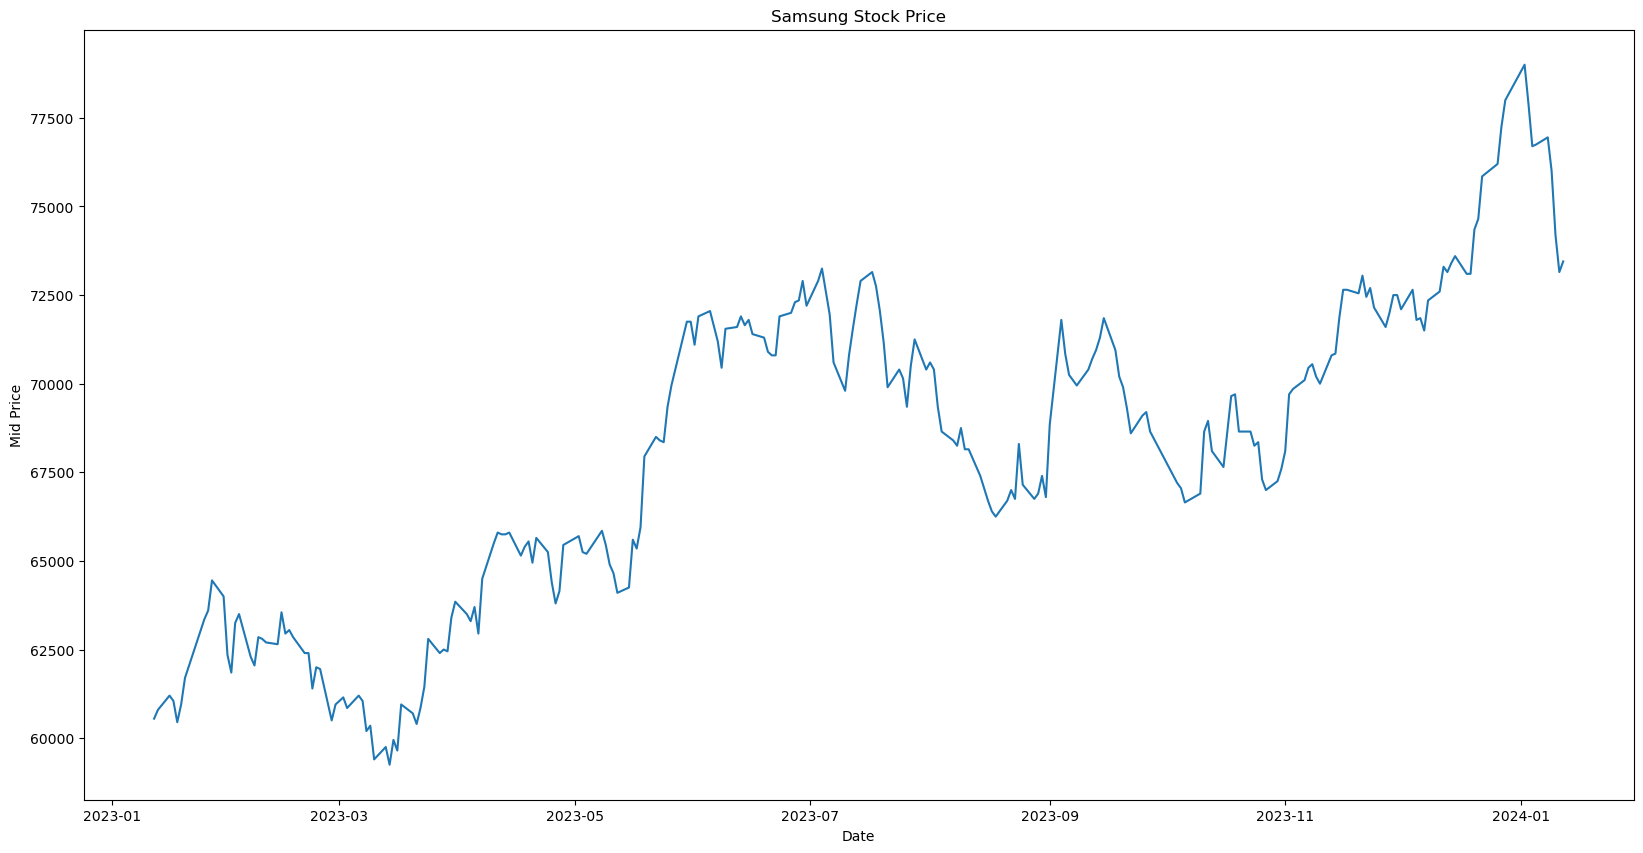

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# csv 파일 읽어오기
data = pd.read_csv('samsung.csv')

# 날짜를 datetime 형태로 변환
data['Date'] = pd.to_datetime(data['Date'])

# High와 Low의 평균값 계산하여 'Mid' 컬럼 생성
data['Mid'] = (data['High'] + data['Low']) / 2

# 데이터의 마지막 20% 추출
recent_data = data.tail(int(len(data) * 0.2))

# 시각화
plt.figure(figsize=(20,10))
plt.plot(recent_data['Date'], recent_data['Mid'])
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.title('Samsung Stock Price')
plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_17 (LSTM)              (None, 64)                29440     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 10s 51ms/step - loss: 0.0022 - val_loss: 5.1412e-04
Epoch 2/20
95/95 [==============================] - 3s 37ms/step - loss: 9.9922e-04 - val_loss: 4.5638e-04
Epoch 3/20
95/95 [==============================] - 3s 35ms/step - lo

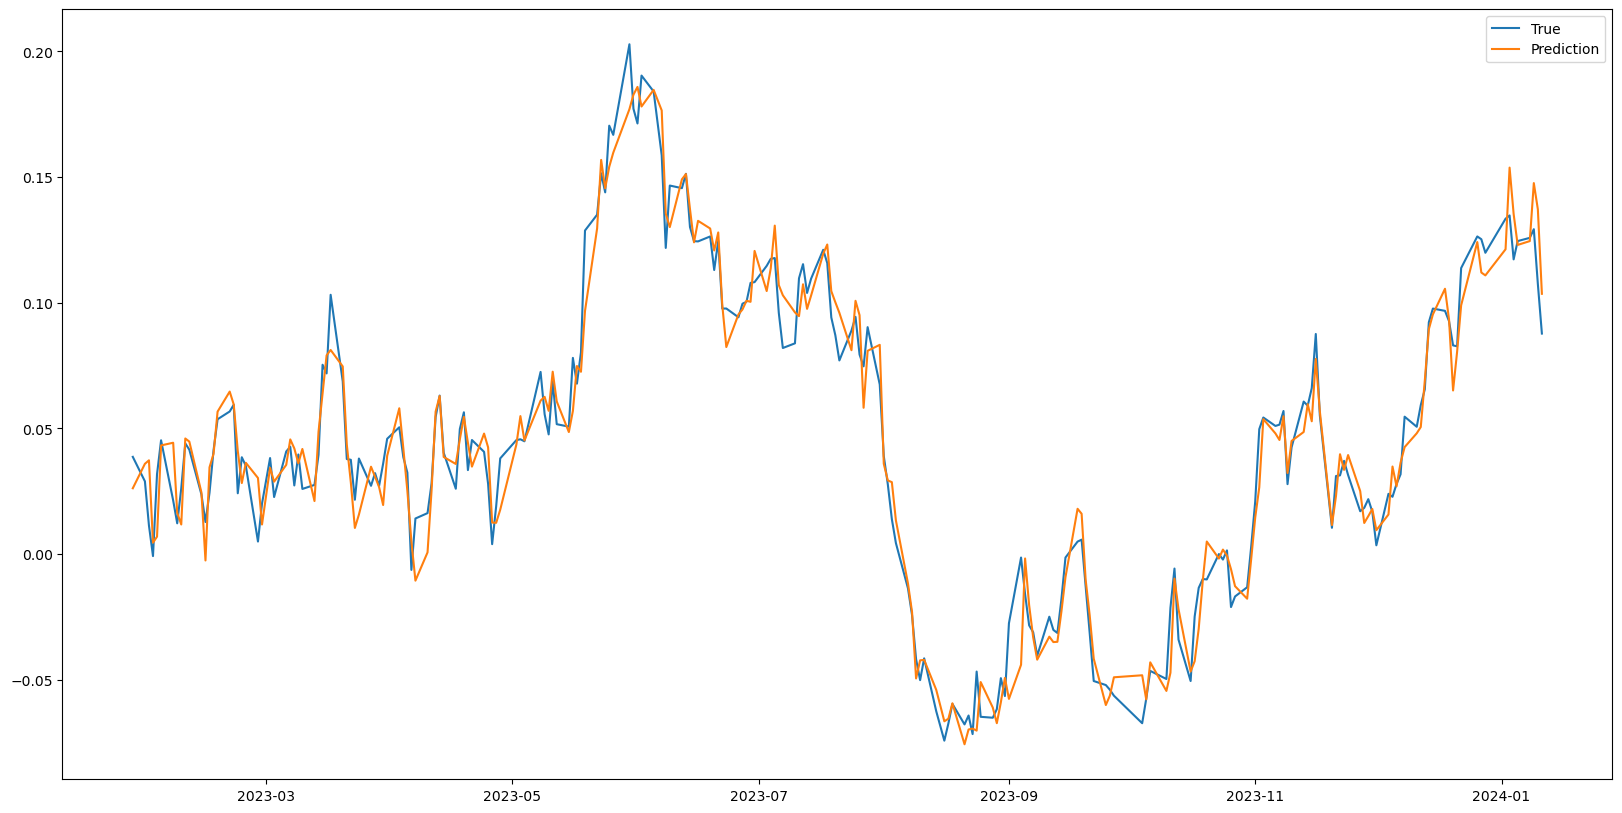

In [12]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range = data.index[row+seq_len : row + len(y_test)+seq_len]

ax.plot(x_range, y_test, label='True')
ax.plot(x_range, pred, label='Prediction')
ax.legend()
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_19 (LSTM)              (None, 64)                29440     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 10s 52ms/step - loss: 0.0019 - val_loss: 5.1910e-04
Epoch 2/20
95/95 [==============================] - 4s 42ms/step - loss: 9.2337e-04 - val_loss: 3.5048e-04
Epoch 3/20
95/95 [==============================] - 4s 40ms/step - lo

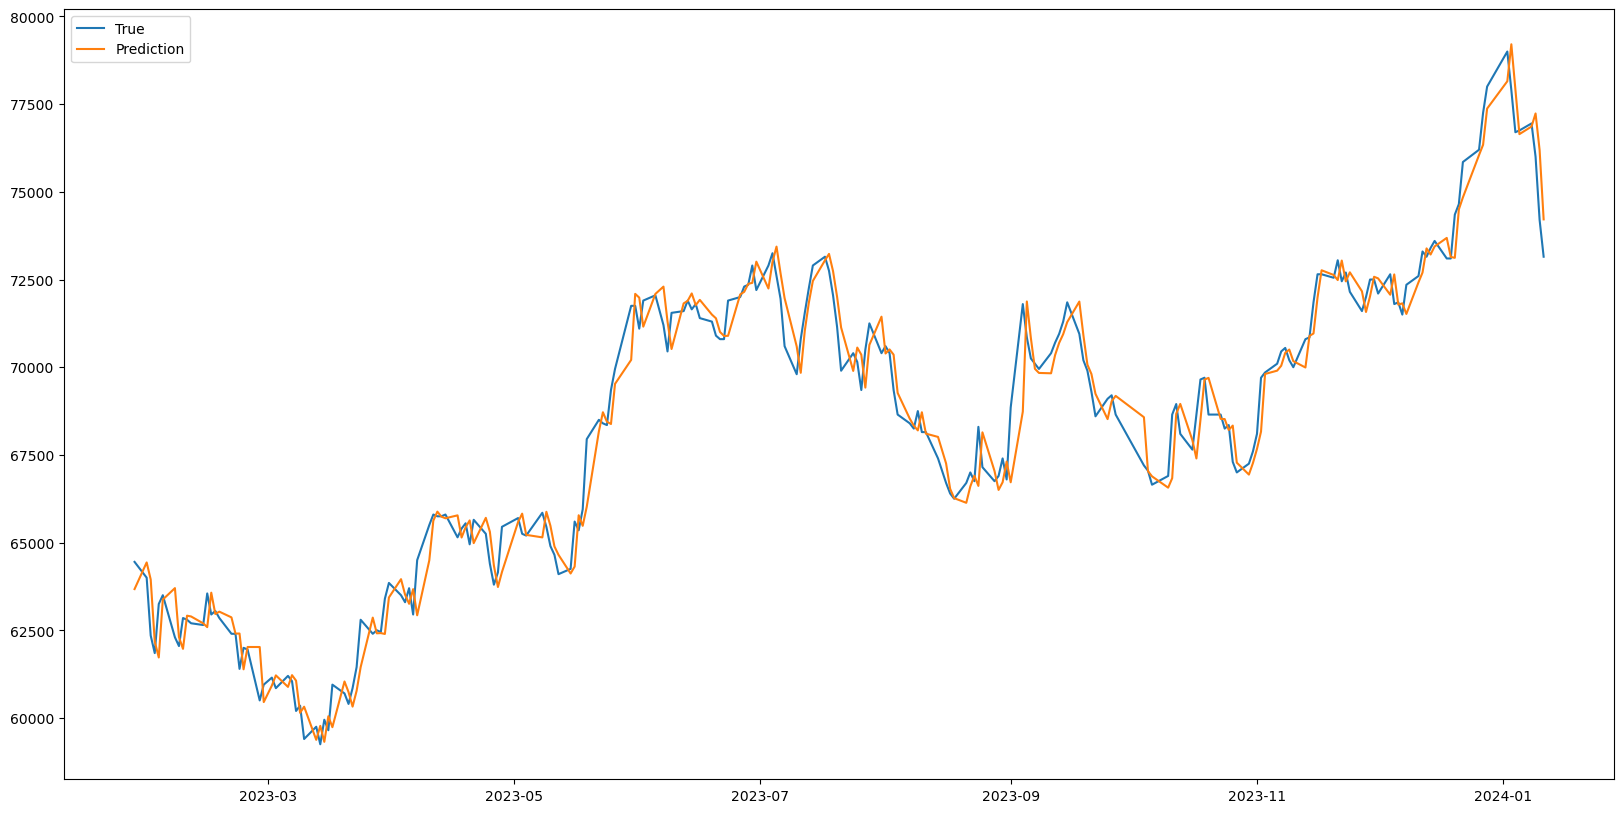

In [13]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# Recover the original prices instead of the scaled version
pred_result = []
y_test_result = []
for i in range(len(y_test)):
    pred_result.append((pred[i] + 1) * mid_prices[row + i])
    y_test_result.append((y_test[i] + 1) * mid_prices[row + i])


# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range = data.index[row+seq_len : row + len(y_test_result)+seq_len]

ax.plot(x_range, y_test_result, label='True')
ax.plot(x_range, pred_result, label='Prediction')
ax.legend()
plt.show()



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_35 (LSTM)              (None, 64)                29440     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 6s 28ms/step - loss: 0.0023 - val_loss: 7.3403e-04
Epoch 2/20
95/95 [==============================] - 2s 19ms/step - loss: 0.0011 - val_loss: 3.8943e-04
Epoch 3/20
95/95 [==============================] - 2s 25ms/step - loss: 

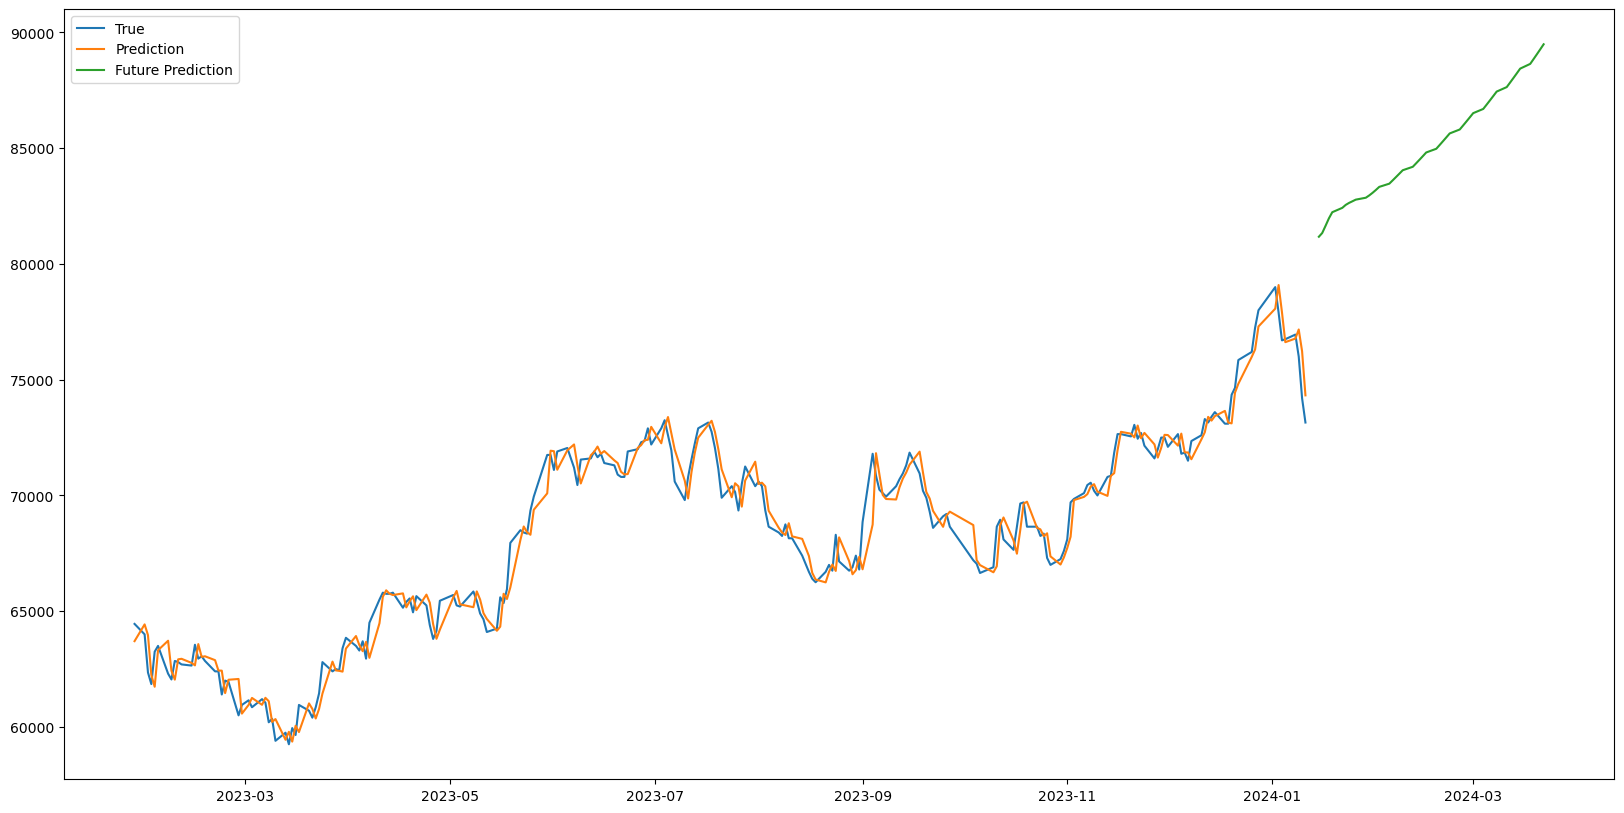

In [40]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# Prediction
pred = model.predict(x_test)

# Recover the original prices instead of the scaled version
pred_result = []
y_test_result = []
for i in range(len(y_test)):
    pred_result.append((pred[i] + 1) * mid_prices[row + i])
    y_test_result.append((y_test[i] + 1) * mid_prices[row + i])

# 미래 50일간의 데이터 예측
for i in range(50):
    last_data = np.reshape(x_test[-1], (1, 50, 1))
    future_pred = model.predict(last_data)
    pred_result.append((future_pred[0] + 1) * mid_prices[-1])
    new_data = np.append(x_test[-1][1:], future_pred[0])
    x_test = np.append(x_test, np.reshape(new_data, (1, 50, 1)), axis=0)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range_past = data.index[row+seq_len : row + len(y_test)+seq_len]
x_range_future = pd.date_range(data.index[-1]+pd.DateOffset(1), periods=50, freq='B')

ax.plot(x_range_past, y_test_result, label='True')
ax.plot(x_range_past, pred_result[:len(y_test_result)], label='Prediction')
ax.plot(x_range_future, pred_result[len(y_test_result):], label='Future Prediction')
ax.legend()
plt.show()





Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_41 (LSTM)              (None, 64)                29440     
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 9s 34ms/step - loss: 0.0024 - val_loss: 7.8299e-04
Epoch 2/20
95/95 [==============================] - 2s 24ms/step - loss: 0.0015 - val_loss: 5.7123e-04
Epoch 3/20
95/95 [==============================] - 3s 27ms/step - loss: 

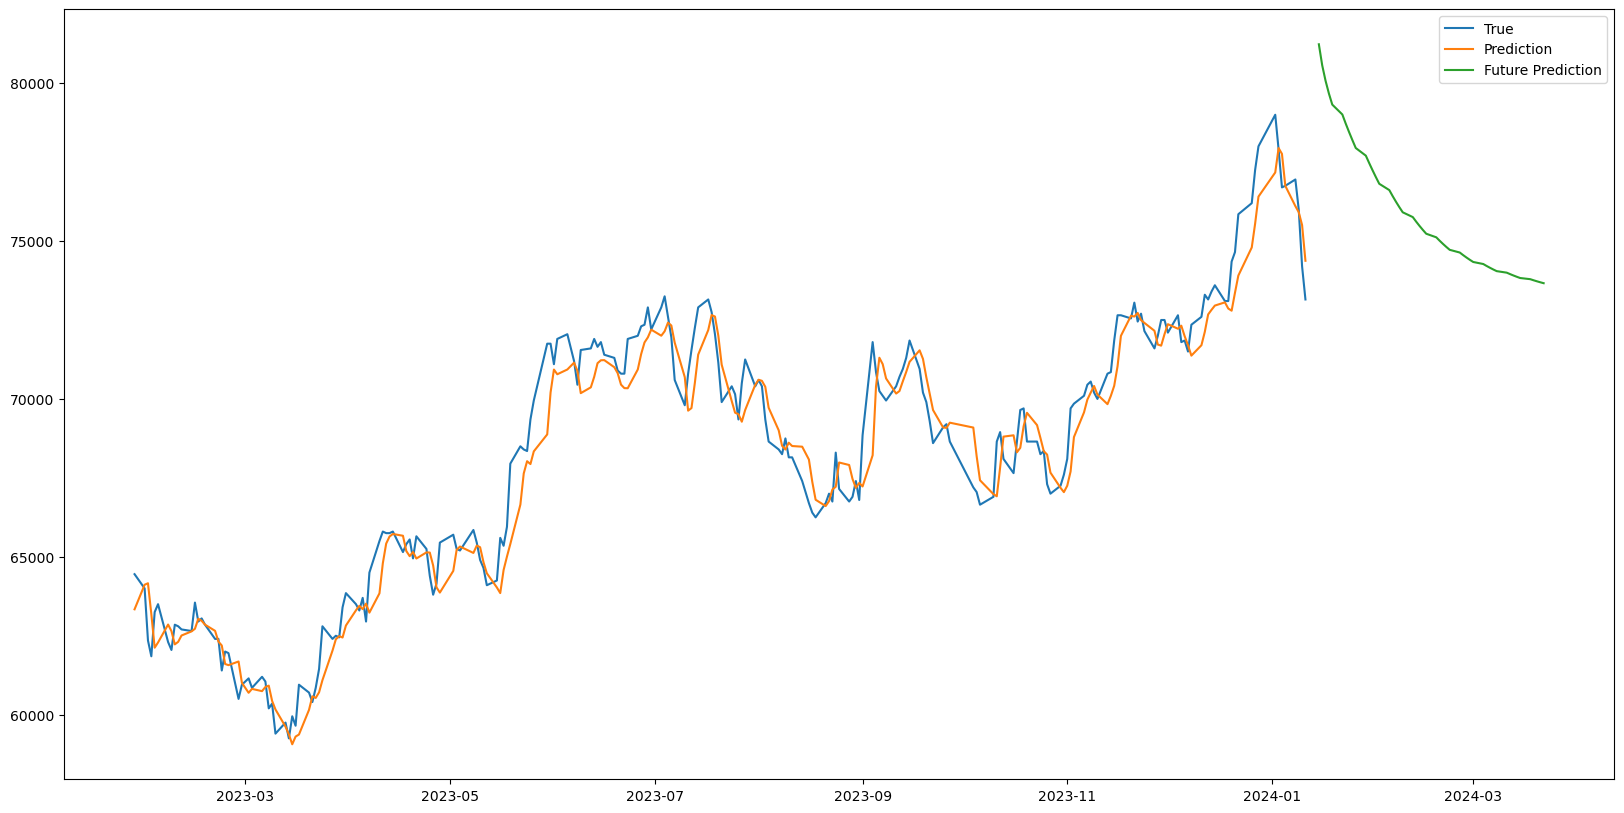

In [43]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model = Sequential() 

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) 
model.add(Dropout(0.2))  # Dropout layer 추가

model.add(LSTM(64, return_sequences=False)) 
model.add(Dropout(0.2))  # Dropout layer 추가

model.add(Dense(1, activation='linear')) 

model.compile(loss='mse', optimizer='adam') 

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# Prediction
pred = model.predict(x_test)

# Recover the original prices instead of the scaled version
pred_result = []
y_test_result = []
for i in range(len(y_test)):
    pred_result.append((pred[i] + 1) * mid_prices[row + i])
    y_test_result.append((y_test[i] + 1) * mid_prices[row + i])

# 미래 50일간의 데이터 예측
for i in range(50):
    last_data = np.reshape(x_test[-1], (1, 50, 1))
    future_pred = model.predict(last_data)
    pred_result.append((future_pred[0] + 1) * mid_prices[-1])
    new_data = np.append(x_test[-1][1:], future_pred[0])
    x_test = np.append(x_test, np.reshape(new_data, (1, 50, 1)), axis=0)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range_past = data.index[row+seq_len : row + len(y_test)+seq_len]
x_range_future = pd.date_range(data.index[-1]+pd.DateOffset(1), periods=50, freq='B')

ax.plot(x_range_past, y_test_result, label='True')
ax.plot(x_range_past, pred_result[:len(y_test_result)], label='Prediction')
ax.plot(x_range_future, pred_result[len(y_test_result):], label='Future Prediction')
ax.legend()
plt.show()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_49 (LSTM)              (None, 64)                29440     
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 39905 (155.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
95/95 [==============================] - 9s 48ms/step - loss: 0.0024 - val_loss: 5.2181e-04
Epoch 2/20
95/95 [==============================] - 2s 21ms/step - loss: 0.0011 - val_loss: 4.2575e-04
Epoch 3/20
95/95 [==============================] - 2s 26ms/step - loss: 

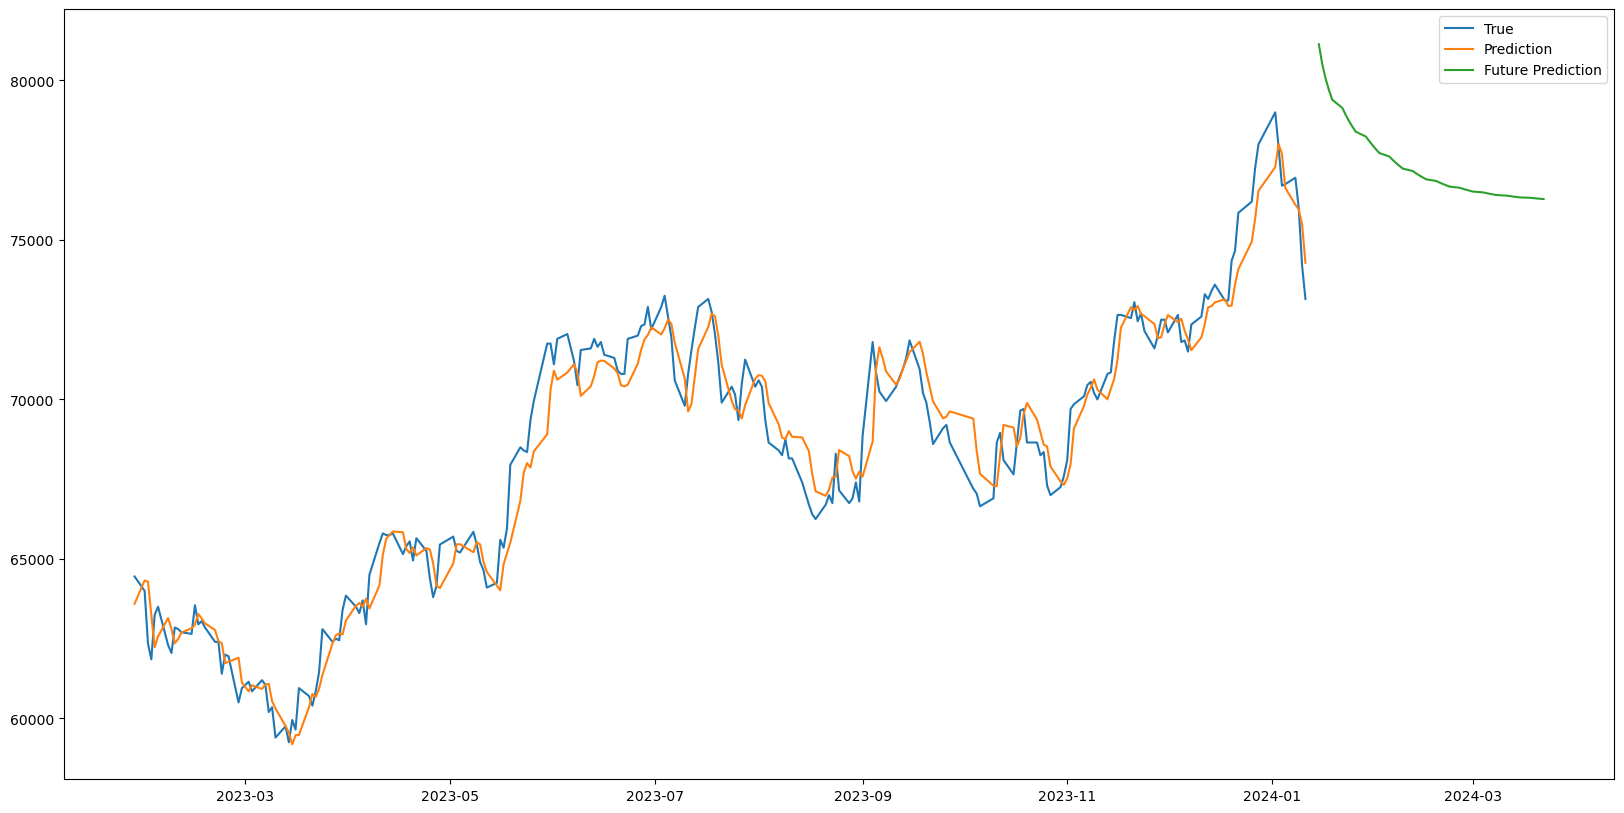

In [46]:
import pandas as pd # csv파일 로드용
import numpy as np # 행렬 연산용
import matplotlib.pyplot as plt # 데이터 시각화

#딥러닝 모델 작성 keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime



# Load Dataset
data = pd.read_csv('samsung.csv') #데이터 로드

# 날짜 컬럼을 datetime 타입으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 인덱스를 날짜로 설정
data.set_index('Date', inplace=True)

## Compute Mid Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 # 중간 가격 계산


# Create Windows
seq_len = 50
sequence_length = seq_len + 1 # 50개의 데이터 + 예측할 데이터 1개 (윈도우 하나에 51개의 데이터 저장)

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])


# Normalize Data (데이터 정규)
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.80))
train = result[:row, :] # 전체 데이터의 80%를 train set으로 분리함

# 윈도우마다 51개의 데이터가 들어있고
# 50개의 데이터를 input으로 나머지 1일의 데이터를 예측할 것임

x_train = train[:, :-1] # 50개
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] # 마지막 1개

x_test = result[row:, :-1] # 50개
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1] # 마지막 1개

x_train.shape, x_test.shape


# Build a Model
    
model = Sequential() # sequential이라는 class를 사용

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) # input 50개 (units 50개)

model.add(LSTM(64, return_sequences=False)) # (units 64개)

model.add(Dense(1, activation='linear')) # ouput은 1개 - 다음날의 데이터 예측

model.compile(loss='mse', optimizer='adam') # 손실 함수는 Mean Squared Error 사용, optimizer는 rmsprop 사용

model.summary()


# Training
model = Sequential() 

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) 
model.add(Dropout(0.2))  # Dropout layer 추가

model.add(LSTM(64, return_sequences=False)) 
model.add(Dropout(0.2))  # Dropout layer 추가

model.add(Dense(1, activation='linear')) 

model.compile(loss='mse', optimizer='adam') 

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

# Prediction
pred = model.predict(x_test)

# Recover the original prices instead of the scaled version
pred_result = []
y_test_result = []
for i in range(len(y_test)):
    pred_result.append((pred[i] + 1) * mid_prices[row + i])
    y_test_result.append((y_test[i] + 1) * mid_prices[row + i])

# 미래 50일간의 데이터 예측
for i in range(50):
    last_data = np.reshape(x_test[-1], (1, 50, 1))
    future_pred = model.predict(last_data)
    pred_result.append((future_pred[0] + 1) * mid_prices[-1])
    new_data = np.append(x_test[-1][1:], future_pred[0])
    x_test = np.append(x_test, np.reshape(new_data, (1, 50, 1)), axis=0)

fig = plt.figure(facecolor='white', figsize=(20, 10)) 
ax = fig.add_subplot(111) 

# x축 데이터 생성
x_range_past = data.index[row+seq_len : row + len(y_test)+seq_len]
x_range_future = pd.date_range(data.index[-1]+pd.DateOffset(1), periods=50, freq='B')

ax.plot(x_range_past, y_test_result, label='True')
ax.plot(x_range_past, pred_result[:len(y_test_result)], label='Prediction')
ax.plot(x_range_future, pred_result[len(y_test_result):], label='Future Prediction')
ax.legend()
plt.show()
